# DSI Project 2 - Ames Housing Data and Kaggle Challenge

### Part 2: EDA 

[Data Dictionary](https://www.kaggle.com/c/dsir-712-project-2-regression-challenge/data)


### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading of cleaned CSVs

In [2]:
train_clean = pd.read_csv('./datasets/train_cleaned.csv')
train_clean.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,68.0,13517,Pave,IR1,Lvl,...,TA,Y,0,44,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,...,TA,Y,0,74,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,...,TA,Y,0,52,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,...,TA,Y,100,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,...,TA,N,0,59,0,0,3,2010,WD,138500


In [3]:
#dropping the Unnamed column
train_clean.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
train_clean.shape

(2048, 73)

__Check for nulls__

In [5]:
train_clean.columns[train_clean.isnull().any()]

Index([], dtype='object')

In [6]:
sum(train_clean.isnull().sum()) 

0

Let's take a look at the distribution of our dependent variable, what we aim to make predictions of. 

In [7]:
train_clean.saleprice.describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


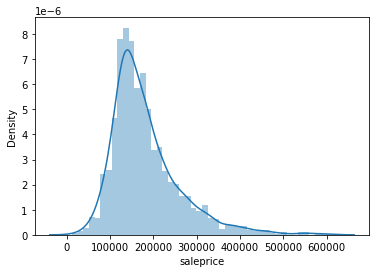

In [8]:
sns.distplot(train_clean.saleprice);

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


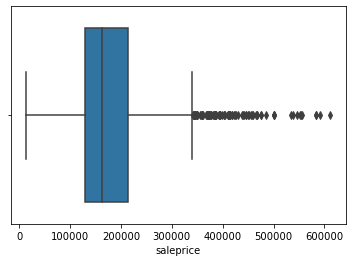

In [9]:
sns.boxplot(train_clean.saleprice);

* On average sale prices are a little over 181K, with homes ranging from as little as ~13K to a little over 600K. That's a quite a vast range. 
* Based on the box plot above, there are quite a number of outliers

### EDA- Correlation Heat Map 

<AxesSubplot:>

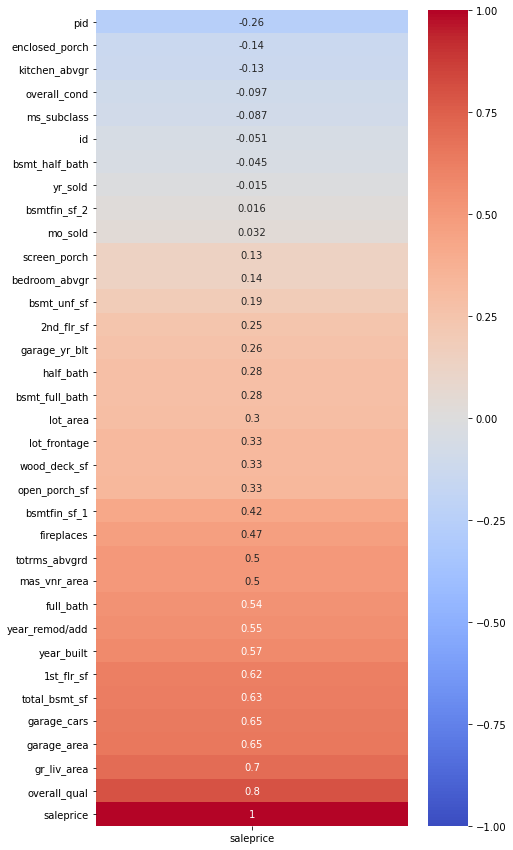

In [10]:
#Coorelation heat map
plt.figure(figsize=(7, 15))
sns.heatmap(train_clean.corr()[['saleprice']].sort_values('saleprice'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

* For our initial analysis we've decided to look at variables that have a strong (>0.5) negative or positive correlation (+/-) to the dependent variable, sale price. 

Let's take a visual look at these variables in correlation to the the sales price:

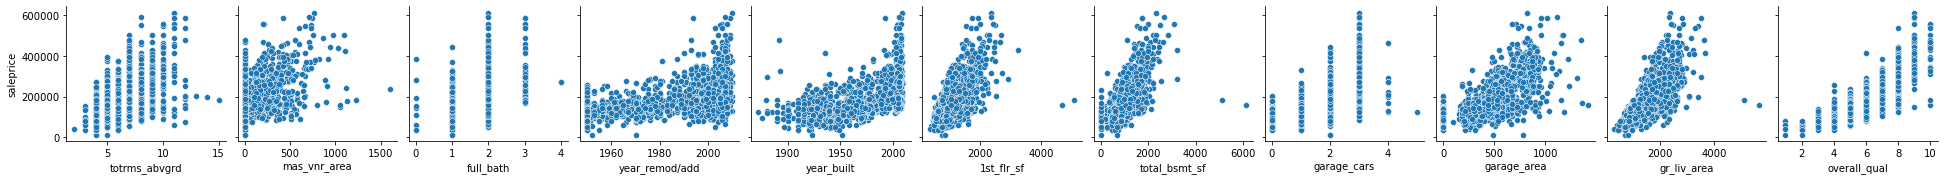

In [11]:
sns.pairplot(train_clean, x_vars=['totrms_abvgrd', 'mas_vnr_area', 'full_bath', 'year_remod/add', 'year_built',\
                                 '1st_flr_sf', 'total_bsmt_sf', 'garage_cars','garage_area','gr_liv_area', 'overall_qual'], y_vars=['saleprice']);

* As our objective is to provide an overview of what sort of returns investing significantly in beds, baths and basements may have on a home's selling prices lets look at their associated variables first.

### Beds 

__Total Rooms__

* There are no exclusive 'bed' variables that are strongly correlated (>+/- 0.5), but we do have the variable 'total rooms'(including bedrooms and excluding bathrooms) as a part of this threshold that we can delve into. 


Text(0, 0.5, 'Average Sale Price')

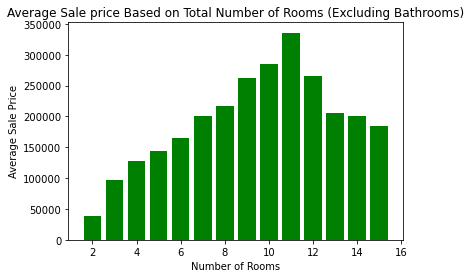

In [12]:
x_room = sorted(set(train_clean['totrms_abvgrd']))
y_room = train_clean.groupby(train_clean['totrms_abvgrd'])['saleprice'].mean()
plt.bar(x_room, y_room, color ='green')
plt.title('Average Sale price Based on Total Number of Rooms (Excluding Bathrooms)')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Sale Price')

[Graphing code source](https://github.com/scaress21/ames_housing/blob/master/code/02_EDA.ipynb)

* The graph displays a steady increase up until the 11 room mark then proceeds to decline. After having a total number of 11 rooms(excluding bathrooms) within one home the average sales price dips. From 1 to 10 rooms it pays to have a house with as many rooms (not considering the size) as possible.  

__Rooms Above Grade__

* Although not within the "strong correlation" threshold, for the purposes of our objective let's look at the other variables related bedroom and their relation to the sales price. 

Text(0, 0.5, 'Average Sale Price')

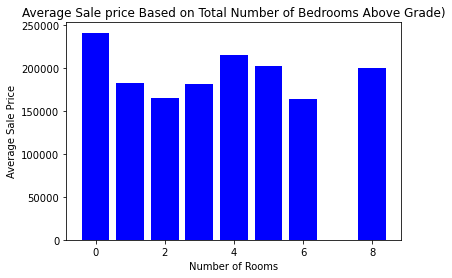

In [13]:
x_abv = sorted(set(train_clean['bedroom_abvgr']))
y_abv = train_clean.groupby(train_clean['bedroom_abvgr'])['saleprice'].mean()
plt.bar(x_abv, y_abv, color = 'blue')
plt.title('Average Sale price Based on Total Number of Bedrooms Above Grade)')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Sale Price')

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


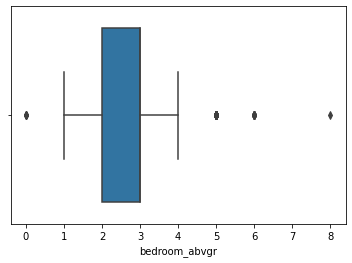

In [14]:
sns.boxplot(train_clean.bedroom_abvgr);

* The average sales price indicated by the bar graph above wavers from number of bedroom to number of bedroom, there is not a continuous increase in average sales price as a result of an equal increase in the number of bedrooms. A home with a total of six bedrooms can be sold around the same price as that of home with just two bedrooms. 
* A better look at the box and whisker plot above shows some very clear outliers that may be impacting our results. Moving forward we'll be cautious of this variable. 

### Baths

__Full Baths__

Full baths had a strong correlation of 0.54 to the sales price, let's take a further look. 

Text(0, 0.5, 'Average Sale Price')

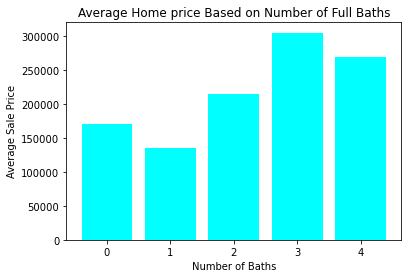

In [15]:
x_full = sorted(set(train_clean['full_bath']))
y_full = train_clean.groupby(train_clean['full_bath'])['saleprice'].mean()
plt.bar(x_full, y_full, color = 'cyan')
plt.title('Average Home price Based on Number of Full Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Average Sale Price')

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


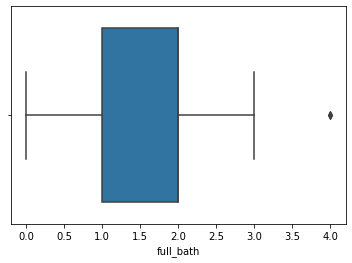

In [16]:
sns.boxplot(train_clean.full_bath);

In [17]:
#Curious to see how many observations with zero full baths there are 
train_clean.value_counts('full_bath')

full_bath
2    1095
1     899
3      44
0       8
4       2
dtype: int64

* Putting aside the observations that have zero baths (most likely data entry error) it pays to have more bathrooms. There are higher average sales prices for homes that have 3 full baths compared to 2 baths but we see a dip in sales prices from 3 full baths to 4 full bathrooms. 3 bathrooms seem to be the sweet spot. 



__More bathrooms__ 

* Although not within the "strong correlation" threshold for the purposes of our objective let's look at the other variables related to bathrooms and their relation to the sales price. 

__Half Baths__

Text(0, 0.5, 'Average Home Price')

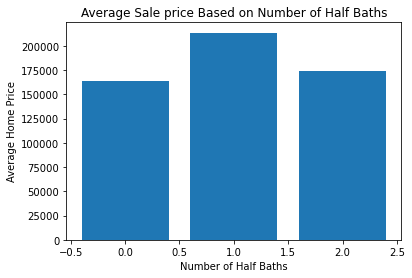

In [18]:
x_half = sorted(set(train_clean['half_bath']))
y_half = train_clean.groupby(train_clean['half_bath'])['saleprice'].mean()
plt.bar(x_half, y_half)
plt.title('Average Sale price Based on Number of Half Baths')
plt.xlabel('Number of Half Baths')
plt.ylabel('Average Home Price') 

* Having at least 1 half bath looks to result in higher sales prices, an additional one after that shows a dip in the average sales prices.  

### Basements 

* Out of all the numeric values related to the basement features, only total basement square foot had a strong correlation with the sales price. Let's take a look at that first. 

In [19]:
#Value counts
train_clean.total_bsmt_sf.value_counts()

0.0       53
864.0     51
1040.0    20
672.0     20
816.0     17
          ..
516.0      1
954.0      1
2153.0     1
721.0      1
485.0      1
Name: total_bsmt_sf, Length: 892, dtype: int64

Text(0, 0.5, 'Sale Price')

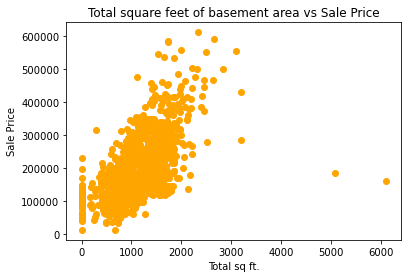

In [20]:
plt.scatter(train_clean['total_bsmt_sf'], train_clean['saleprice'], c ='orange')
plt.title('Total square feet of basement area vs Sale Price')
plt.xlabel('Total sq ft.')
plt.ylabel('Sale Price')

In [21]:
train_clean.groupby ('total_bsmt_sf').mean()[['saleprice']]

,saleprice
total_bsmt_sf,
0.0,103491.962264
160.0,113500.000000
173.0,89000.000000
190.0,91300.000000
192.0,143000.000000
...,...
3094.0,555000.000000
3200.0,430000.000000
3206.0,284000.000000


__Initial Observations:__ 
* Noted two observations with very large basement areas (possible outliers)
* Also noted a cloud like shape and less of a straight line, if  paired solely with the dependent variable this wouldn't be a good fit model. 
* A majority of the observations seemed to clustered around the 0 USD to approximately 350,000 USD sale price. With a few surpassing the 500 USD sale price mark. 

### More Basements

* Unlike the other variables (bedrooms and bathrooms) in the data there is qualitative data , i.e. the quality or condition, aligned with basements.Let's look at some of this associated qualitative data. 

__Basement Conditions__: General condition of the basement

Text(0, 0.5, 'Average Home Price')

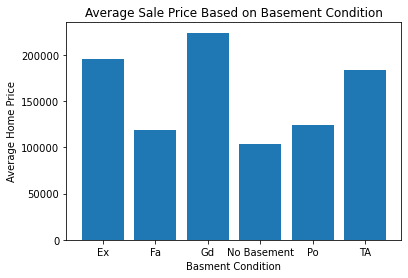

In [22]:
x_cond = sorted(set(train_clean['bsmt_cond']))
y_cond = train_clean.groupby(train_clean['bsmt_cond'])['saleprice'].mean()
plt.bar(x_cond, y_cond)
plt.title('Average Sale Price Based on Basement Condition')
plt.xlabel('Basment Condition')
plt.ylabel('Average Home Price')

* Homes with a 'good' rating basement condition are shown to have higher sale prices followed by those with an 'excellent' rating. 

__Basement Quality:__ Height of the basement
- Ex Excellent (100+ inches)
- Gd Good (90-99 inches)
- TA Typical (80-89 inches)
- Fa Fair (70-79 inches)
- Po Poor (<70 inches)
- NA No Basement

Text(0, 0.5, 'Average Home Price')

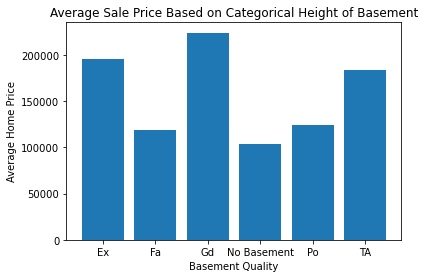

In [23]:
x_qual = sorted(set(train_clean['bsmt_qual']))
y_qual = train_clean.groupby(train_clean['bsmt_qual'])['saleprice'].mean()
plt.bar(x_cond, y_cond)
plt.title('Average Sale Price Based on Categorical Height of Basement')
plt.xlabel('Basement Quality')
plt.ylabel('Average Home Price')

* Homes with a 'good' rating, meaning a basement height between 90-99 inches are shown to have higher sale prices.
* Homes with no basements had the lowest average sales prices. 

__Quality of Basement Finished Area__

Text(0, 0.5, 'Average Sale Price')

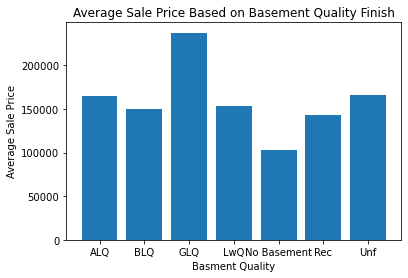

In [24]:
x_qualfin1 = sorted(set(train_clean['bsmtfin_type_1']))
y_qualfin1 = train_clean.groupby(train_clean['bsmtfin_type_1'])['saleprice'].mean()
plt.bar(x_qualfin1, y_qualfin1)
plt.title('Average Sale Price Based on Basement Quality Finish')
plt.xlabel('Basment Quality')
plt.ylabel('Average Sale Price')

* Once again we see that it pays to have not only a finished basement but one of quality, well at least one that is of relatively "good" quality, as these tend to result in overall higher average sales prices. 
* Having no basement at all leads to a lower sales price compared to just having one to begin with even if unfinished (unf). 

__4) Quality of second finished area (if present)__

Text(0, 0.5, 'Average Sale Price')

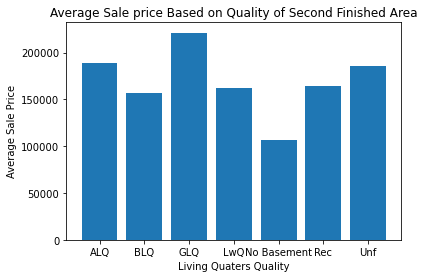

In [25]:
x_qualfin2 = sorted(set(train_clean['bsmtfin_type_2']))
y_qualfin2 = train_clean.groupby(train_clean['bsmtfin_type_2'])['saleprice'].mean()
plt.bar(x_qualfin2, y_qualfin2)
plt.title('Average Sale price Based on Quality of Second Finished Area')
plt.xlabel('Living Quaters Quality')
plt.ylabel('Average Sale Price')

* Homes with "good" living quarters/a second finished area on average have a higher sales prices

### Overall Quality

As our analysis  above clearly indicates not only having certain features in your home is enough but what differentiates the outcome is having features of good enough  quality. With that in mind we shall take a deeper look at overall house quality, which also happens to be the independent variable with the strongest linear correlation to the sale price, and see how this effects out outcomes.

In [26]:
train_clean.overall_qual.dtype

dtype('int64')

In [27]:
train_clean.overall_qual.value_counts()

5     561
6     506
7     431
8     250
4     158
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

Text(0, 0.5, 'Average Sale Price')

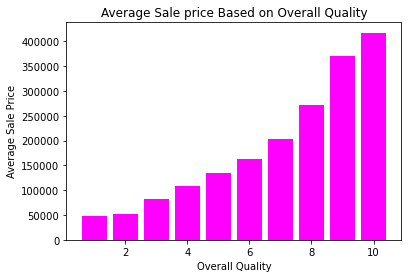

In [28]:
x_overall = sorted(set(train_clean['overall_qual']))
y_overall = train_clean.groupby(train_clean['overall_qual'])['saleprice'].mean()
plt.bar(x_overall, y_overall, color = 'magenta')
plt.title('Average Sale price Based on Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')

In [29]:
train_clean.groupby ('overall_qual').mean()[['saleprice']]

,saleprice
overall_qual,
1,48725.000000
2,51081.000000
3,81309.103448
4,107925.962025
5,134668.311943
6,162891.102767
7,203430.285383
8,271437.044000
9,370197.376623


Based on the information displayed above, it's clear that homes with excellent overall quality finishes sell much higher than those built with poor finishes. Even with a difference of a 1 level rating e.g. "Excellent" (ranked 9) versus "Very Excellent"(ranked 10), the difference in average home price is approximately $47K.

### Findings

__1.__ An increase in the number of total rooms a house has, excluding bathrooms, results in higher selling prices, but once the home surpasses 11 rooms, we see a decrease in sales price. 

__2.__ The number of bedrooms has a weak (0.14) effect on sales prices as indicated by our correlation matrix. 

__3.__ Full baths have a strong (0.54) effect on the selling price, due to a lack of other data surrounding baths, 
i.e. the area of said bath, the quality, or the condition. We can solely rely on the number of bathrooms needed to increase a home's selling price. Having 3 bathrooms was the best number for a higher sales prices, anything more than that showed a reduction in sales price. 

__4.__ Half baths didn't particularly matter. Having at least one increased your sales prices, having two resulted in a reduction in the sales price.

__5.__ Out of all features we assessed, basements showed to have the highest impact on sales prices, particularly the square footage of the basement, with a 0.63 correlation to sales price. 
    - Given a few outliers, there was some pattern of seeing larger basement areas to higher sales prices but
    not enough to rely on solely. We'll have to consider other related features to gain a better relationship.

__6.__ Good is good enough. Analyzing the basement qualitative data, we noted that having a basement with good height, in good condition, and of good quality resulted in higher sales prices. The was no need for these factors to be above and beyond (Excellent) in order to see higher sales prices. 

__7.__ Now houses with 'typical' rating for their basements, still had higher sale prices compared to those with no basements at all. 

__8.__ Overall Quality matters. Building homes with poor materials regardless of the features involved yields lower returns, an investment in excellent building materials overall provides for a higher sales prices. 


Based on the EDA performed in this notebook, it's clear that some of the variables associated with the housing features we are interested in do not have much of a strong relationship with average sales price, particularly the number of bedrooms or total rooms in general. We'd still like use these features in a model, positioning them alongside the 'overall quality' variable to see what sort of results we get. We'll conduct some feature engineering to see what combination of features, produces the strongest best possible model within our scope. Let's shift to the 'modeling' notebooks to delve into this. 